In [12]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_system(f, y0, t0, t_end, h):
    """
    Fourth-order Runge-Kutta method for solving a system of ODEs.
    
    Parameters:
        f: function representing the system of ODEs (dy/dt = f(t, y))
        y0: initial values of variables (as a list or numpy array)
        t0: initial value of t
        t_end: end value of t
        h: step size
        
    Returns:
        List of time values and numpy array of approximated y values for each variable at each time step.
    """
    t_values = []
    y_values = []
    t = t0
    y = np.array(y0)
    
    while t <= t_end:
        t_values.append(t)
        y_values.append(y)
        
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + 0.5 * h, y + 0.5 * k1))
        k3 = h * np.array(f(t + 0.5 * h, y + 0.5 * k2))
        k4 = h * np.array(f(t + h, y + k3))
        
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h
    
    return t_values, np.array(y_values)

def three_body_ode_system( t , y ):
    
    Vx1 = y[0]
    Vy1 = y[1]
    Vz1 = y[2]

    Vx2 = y[3]
    Vy2 = y[4]
    Vz2 = y[5]

    Vx3 = y[6]
    Vy3 = y[7]
    Vz3 = y[8]
    
    Rx1 = y[9]
    Ry1 = y[10]
    Rz1 = y[11]

    Rx2 = y[12]
    Ry2 = y[13]
    Rz2 = y[14]

    Rx3 = y[15]
    Ry3 = y[16]
    Rz3 = y[17]

    r12 = ( ( Rx2 - Rx1 )**2 + ( Ry2 - Ry1 )**2 + ( Rz2 - Rz1 )**2 )**(1/2)
    r13 = ( ( Rx3 - Rx1 )**2 + ( Ry3 - Ry1 )**2 + ( Rz3 - Rz1 )**2 )**(1/2)
    r23 = ( ( Rx3 - Rx2 )**2 + ( Ry3 - Ry2 )**2 + ( Rz3 - Rz2 )**2 )**(1/2)

    r21 = r12
    r31 = r13
    r32 = r23

    dVx1dt =                                    G * m_2 * ( Rx2 - Rx1 ) / r21**3 + G * m_3 * ( Rx3 - Rx1 ) / r31**3
    dVy1dt =                                    G * m_2 * ( Ry2 - Ry1 ) / r21**3 + G * m_3 * ( Ry3 - Ry1 ) / r31**3
    dVz1dt =                                    G * m_2 * ( Rz2 - Rz1 ) / r21**3 + G * m_3 * ( Rz3 - Rz1 ) / r31**3
    
    dVx2dt = G * m_1 * ( Rx1 - Rx2 ) / r12**3                                    + G * m_3 * ( Rx3 - Rx2 ) / r32**3
    dVy2dt = G * m_1 * ( Ry1 - Ry2 ) / r12**3                                    + G * m_3 * ( Ry3 - Ry2 ) / r32**3
    dVz2dt = G * m_1 * ( Rz1 - Rz2 ) / r12**3                                    + G * m_3 * ( Rz3 - Rz2 ) / r32**3
    
    dVx3dt = G * m_1 * ( Rx1 - Rx3 ) / r13**3 + G * m_2 * ( Rx2 - Rx3 ) / r23**3
    dVy3dt = G * m_1 * ( Ry1 - Ry3 ) / r13**3 + G * m_2 * ( Ry2 - Ry3 ) / r23**3
    dVz3dt = G * m_1 * ( Rz1 - Rz3 ) / r13**3 + G * m_2 * ( Rz2 - Rz3 ) / r23**3

    dRx1dt = Vx1
    dRy1dt = Vy1
    dRz1dt = Vz1

    dRx2dt = Vx2
    dRy2dt = Vy2
    dRz2dt = Vz2

    dRx3dt = Vx3
    dRy3dt = Vy3
    dRz3dt = Vz3
    
    # account for thrust acting on second body

    dVx2dt = dVx2dt + T / m_2 * Vx2 / np.sqrt(Vx2**2 + Vy2**2 + Vz2**2)
    dVy2dt = dVy2dt + T / m_2 * Vy2 / np.sqrt(Vx2**2 + Vy2**2 + Vz2**2)
    dVz2dt = dVz2dt + T / m_2 * Vz2 / np.sqrt(Vx2**2 + Vy2**2 + Vz2**2)

    return [ dVx1dt , dVy1dt , dVz1dt , dVx2dt , dVy2dt , dVz2dt , dVx3dt , dVy3dt , dVz3dt , dRx1dt , dRy1dt , dRz1dt , dRx2dt , dRy2dt , dRz2dt , dRx3dt , dRy3dt , dRz3dt ]


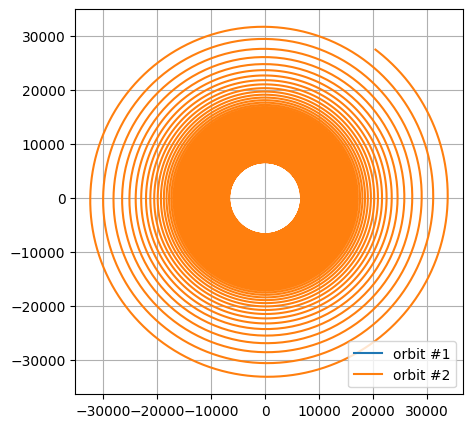

In [13]:
#
# parameters (Earth, Spacecraft, and Nothing)
#

G       = 6.67259 * 10**(-20) # universal gravitational constant 

#
# spacecraft
#
m_0     = 1000
μ       = 3.986 * 10**5
r_0     = 6378 + 300
v_0     = np.sqrt( μ / r_0 )

I_sp    = 20000
g_0     = 9.871 / 1000
T       = 2500 * 10**(-6)

m_1 = 5.9722 * 10**(24) # Earth mass kg
m_2 = m_0 
m_3 = 0

Rx1 = 0
Ry1 = 0
Rz1 = 0
Vx1 = 0
Vy1 = 0
Vz1 = 0

Rx2 = r_0
Ry2 = 0
Rz2 = 0
Vx2 = 0
Vy2 = v_0
Vz2 = 0

Rx3 = 1
Ry3 = 0
Rz3 = 0
Vx3 = 0
Vy3 = 0
Vz3 = 0
y0    = [ Vx1 , Vy1 , Vz1 , Vx2 , Vy2 , Vz2 , Vx3 , Vy3 , Vz3 , Rx1 , Ry1 , Rz1 , Rx2 , Ry2 , Rz2 , Rx3 , Ry3 , Rz3 ]
t0    = 0
t_end = 20 * 24 * 3600
#t_end = 1000
h     = ( t_end - t0 ) / float(10000)
t_values , y_values = runge_kutta_system( three_body_ode_system , y0 , t0 , t_end , h )

plt.figure( figsize=(5,5) )
x1_values = y_values[:,9]
y1_values = y_values[:,10]
plt.plot( x1_values , y1_values , label = 'orbit #1' )
x2_values = y_values[:,12]
y2_values = y_values[:,13]
plt.plot( x2_values , y2_values , label = 'orbit #2' )
#x3_values = y_values[:,15]
#y3_values = y_values[:,16]
#plt.plot( x3_values , y3_values , label = 'orbit #3' )
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
